In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_excel("C:\Users\suhan\Desktop\SEM VI\Time Series\Project\data\data\CPI - Combined (All India).xlsx")
data.head(10)

,Month,CPI - Combined
0,DEC-2023,185.7
1,NOV-2023,186.3
2,OCT-2023,185.3
3,SEP-2023,184.1
4,AUG-2023,186.2
5,JUL-2023,186.3
6,JUN-2023,181.0
7,MAY-2023,179.1
8,APR-2023,178.1
9,MAR-2023,177.2


In [13]:
data['Date'] = pd.to_datetime(data['Month'], format='%b-%Y')
data.drop(['Month'], axis=1, inplace=True)
data.set_index('Date', inplace=True)
data.rename(columns={'CPI - Combined':'CPI'}, inplace=True)
data

,CPI
Date,
2023-12-01,185.7
2023-11-01,186.3
2023-10-01,185.3
2023-09-01,184.1
2023-08-01,186.2
...,...
2013-05-01,106.9
2013-04-01,106.1
2013-03-01,105.5


In [14]:
data.isnull().sum()

CPI    0
dtype: int64

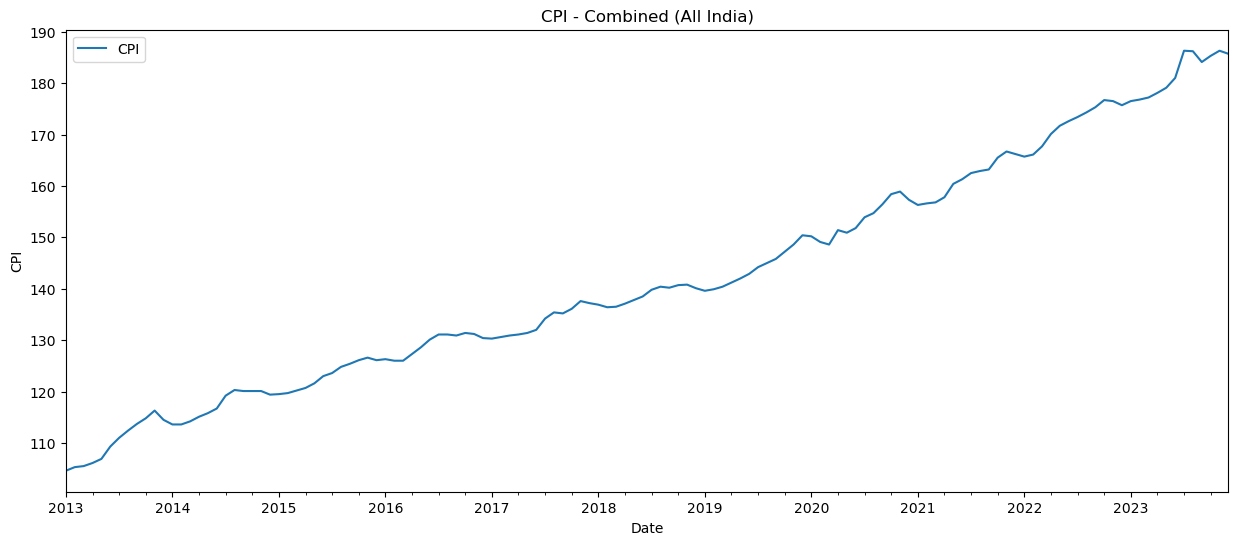

In [15]:
data.plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI - Combined (All India)')
plt.show()

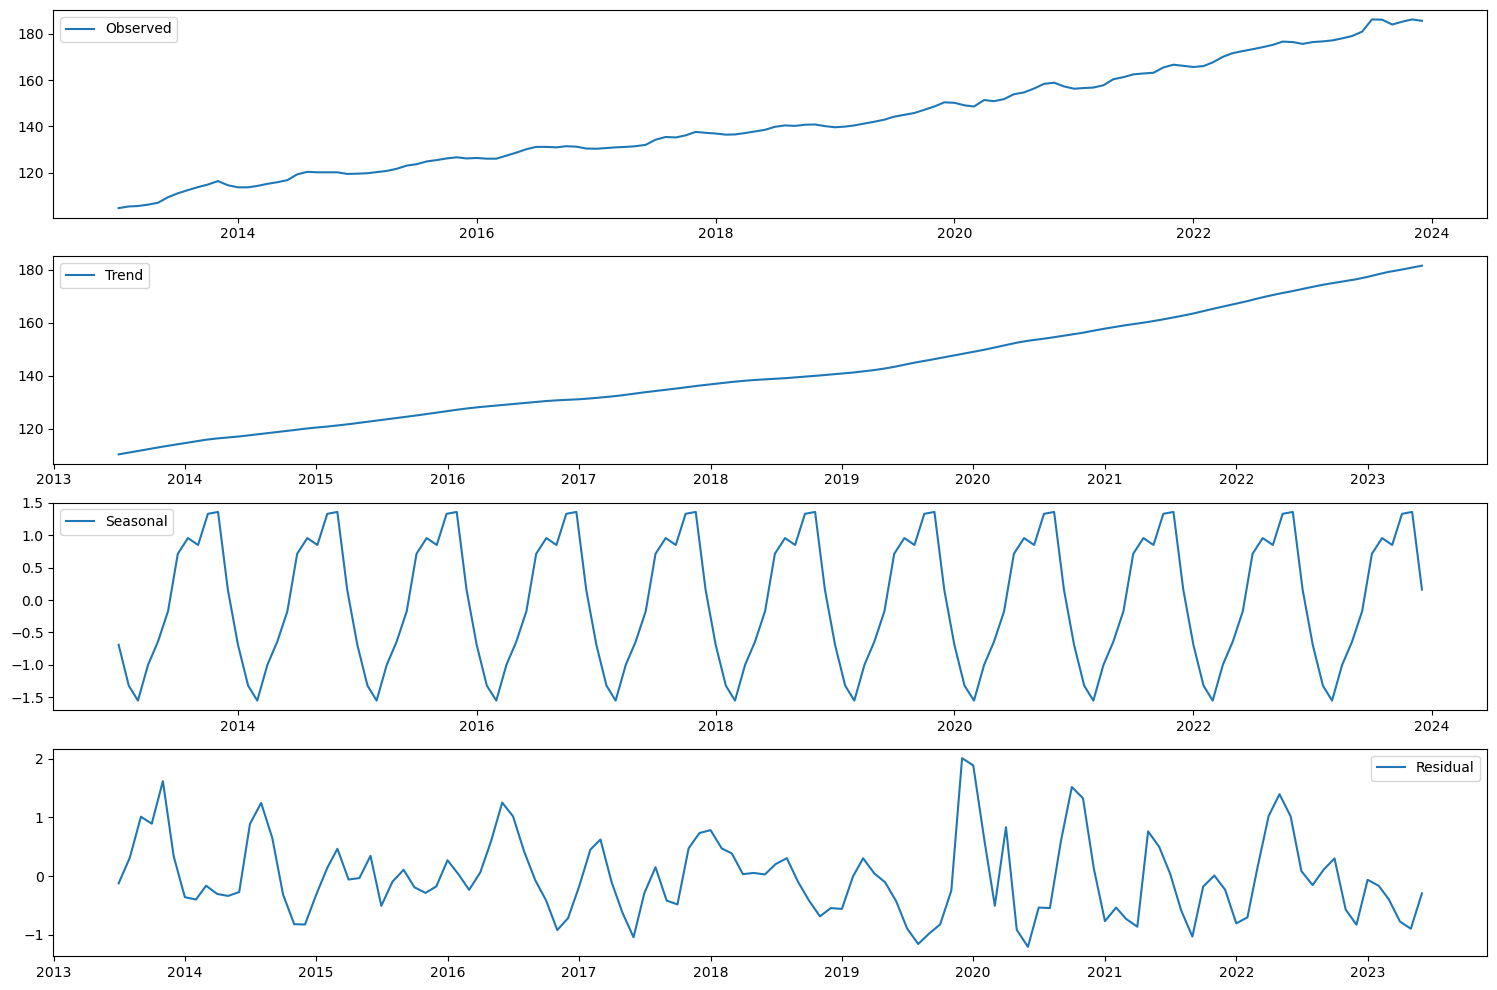

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data)
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

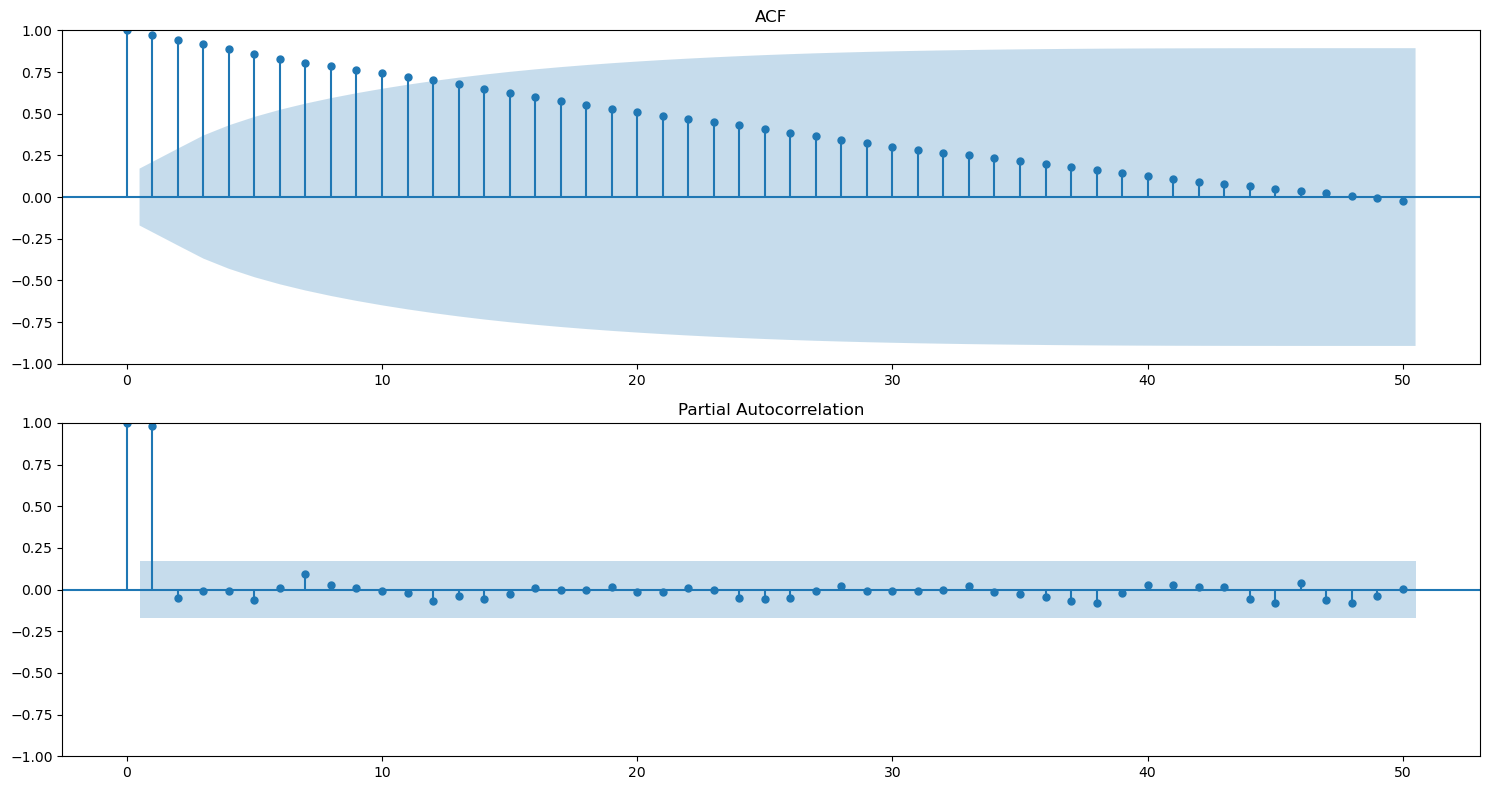

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 8))
plt.subplot(211)
plot_acf(data, lags=50, ax=plt.gca())
plt.title('ACF')
plt.subplot(212)
plt.title('PACF')
plot_pacf(data, lags=50, ax=plt.gca())
plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data, autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
print(f'Critical Values: {adf[4]}')

ADF Statistic: -2.124997370855664
p-value: 0.23458254162748438
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}


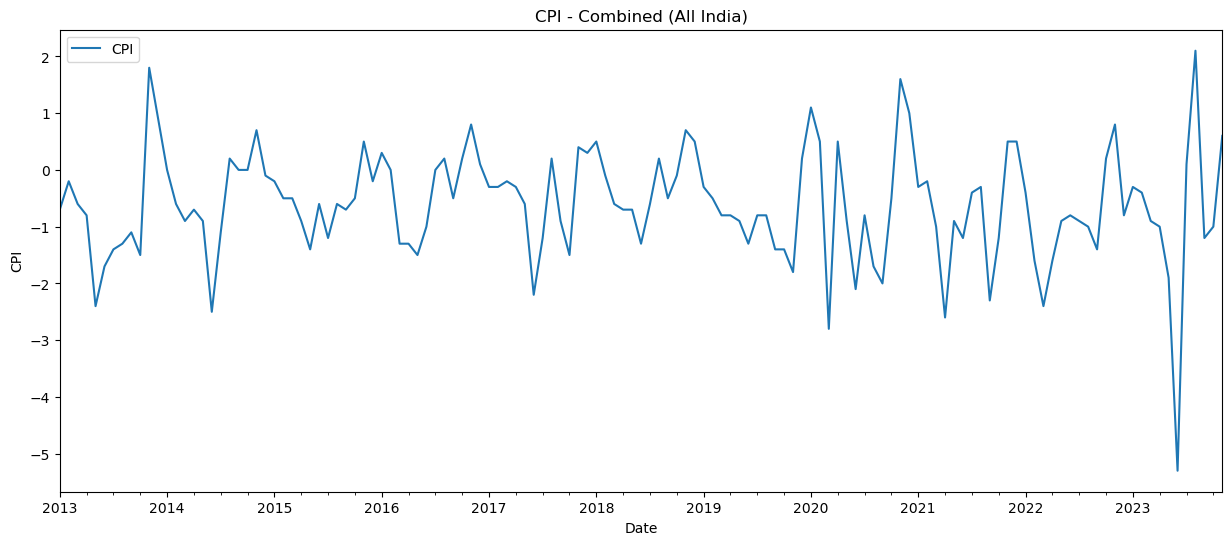

In [19]:
# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

data_diff = data.diff().dropna()
data_diff.plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI - Combined (All India)')
plt.show()

In [20]:
adf = adfuller(data_diff, autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
print(f'Critical Values: {adf[4]}')

ADF Statistic: -7.01553943439952
p-value: 6.74794089484667e-10
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}


In [21]:
from statsmodels.tsa.stattools import kpss

kpss_stat = kpss(data_diff, regression='c', nlags='auto')
print(f'KPSS Statistic: {kpss_stat[0]}')
print(f'p-value: {kpss_stat[1]}')
print(f'Critical Values: {kpss_stat[3]}')

KPSS Statistic: 0.1418625255570777
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [26]:
y = data_diff['CPI'].resample('MS').mean()
train = y[:'2021']
test = y['2022':]

In [27]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=281.747, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=276.286, Time=0.03 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=267.233, Time=0.09 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=270.676, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=250.470, Time=0.25 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=252.546, Time=0.11 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=249.584, Time=0.25 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=250.664, Time=0.42 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=265.046, Time=0.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=263.715, Time=0.04 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=259.540, Time=0.10 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=261.612, Time=0.04 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=245.090, Time=0.34 sec
 ARIMA(0,0,1)(2,0,

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (0, 0, 1), seasonal_order = (2, 0, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.18923D-01    |proj g|=  3.27498D-01

At iterate    5    f=  8.22525D-01    |proj g|=  1.04434D-02

At iterate   10    f=  8.22399D-01    |proj g|=  1.21656D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     14      1     0     0   1.004D-06   8.224D-01
  F =  0.82239849183385083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                CPI   No. Observations:                  108
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 12)   Log Likelihood                 -88.819
Date:                            Tue, 21 May 2024   AIC                            187.638
Time:                                    00:27:26   BIC                            199.792
Sample:                                01-01-2013   HQIC                           192.524
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2283      0.088      2.599      0.009       0.056       0.400
ar.S.L12       0.5185      0.156      3.328      0.001       0.213       0.824
ar.S.L24       0.4331      0.149      2.897      0.004       0.140       0.726
ma.S.L12      -0.4831      0.171     -2.819      0.005      -0.819      -0.147
sigma2         0.4668      0.049      9.527      0.000       0.371       0.563
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                30.36
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               4.77   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

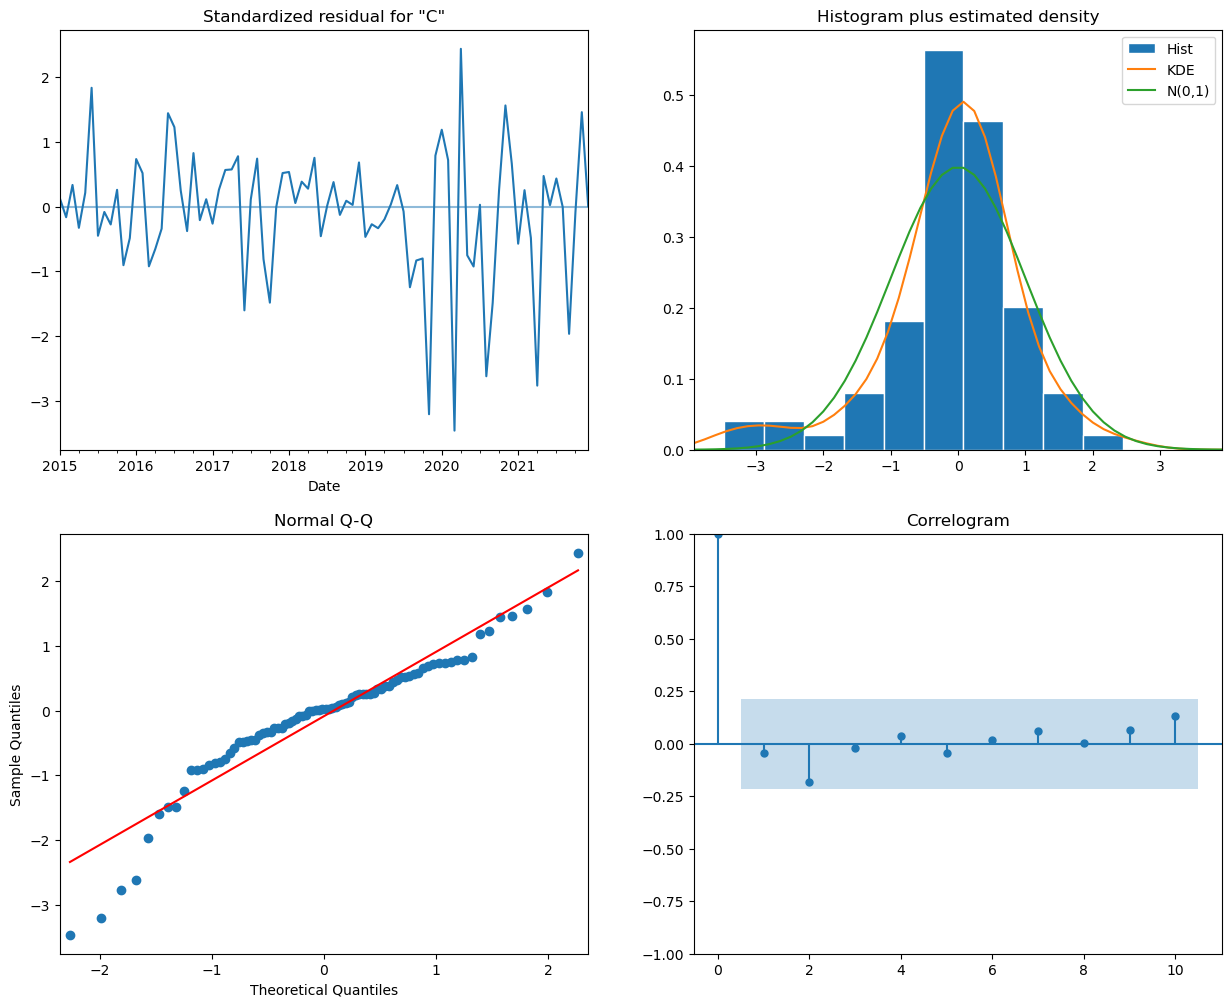

In [29]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

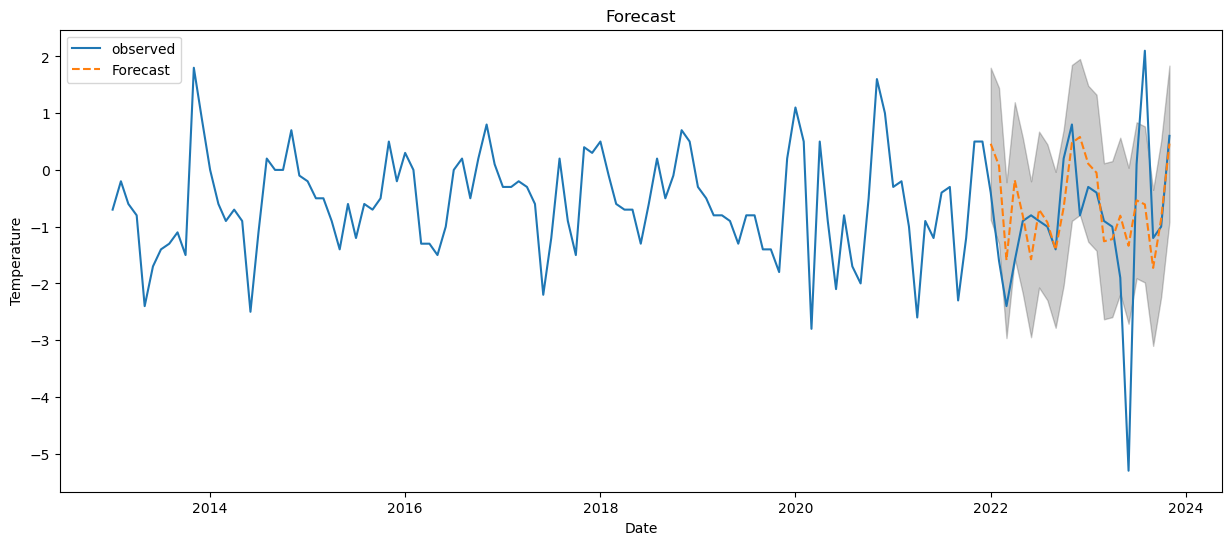

In [31]:
forecast = result.get_forecast(steps = len(test))
plt.figure(figsize=(15, 6))
plt.plot(y.index, y, label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower CPI'], forecast.conf_int()['upper CPI'], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast')
plt.legend()
plt.show()

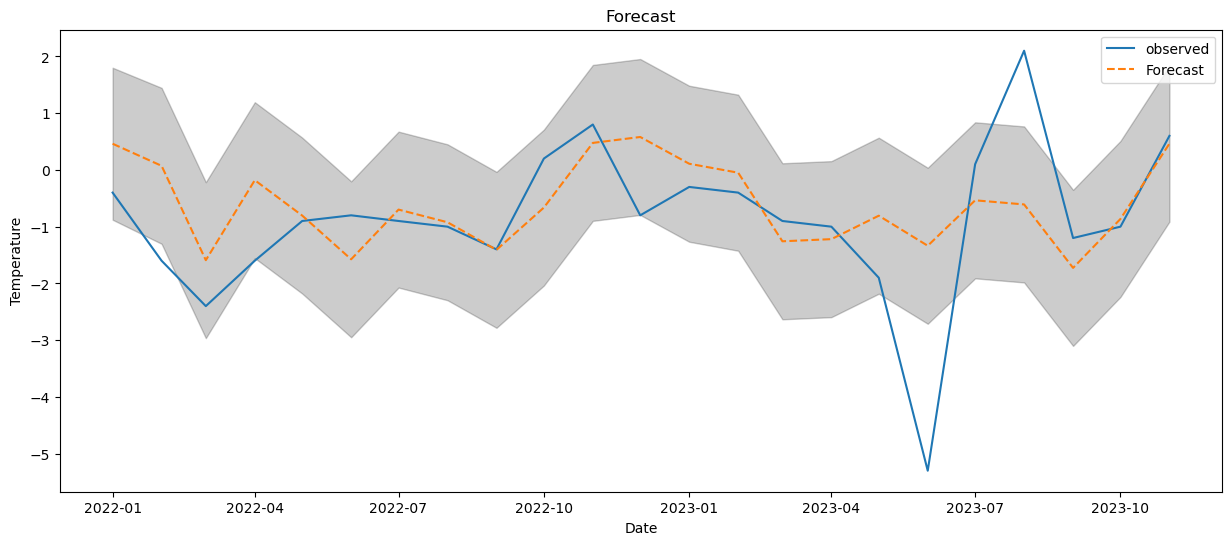

In [33]:
plt.figure(figsize=(15, 6))
plt.plot(y['2022':].index, y['2022':], label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower CPI'], forecast.conf_int()['upper CPI'], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(test, forecast.predicted_mean)
rmse = sqrt(mse)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

RMSE: 1.2343772138960736
MSE: 1.523687106185833
